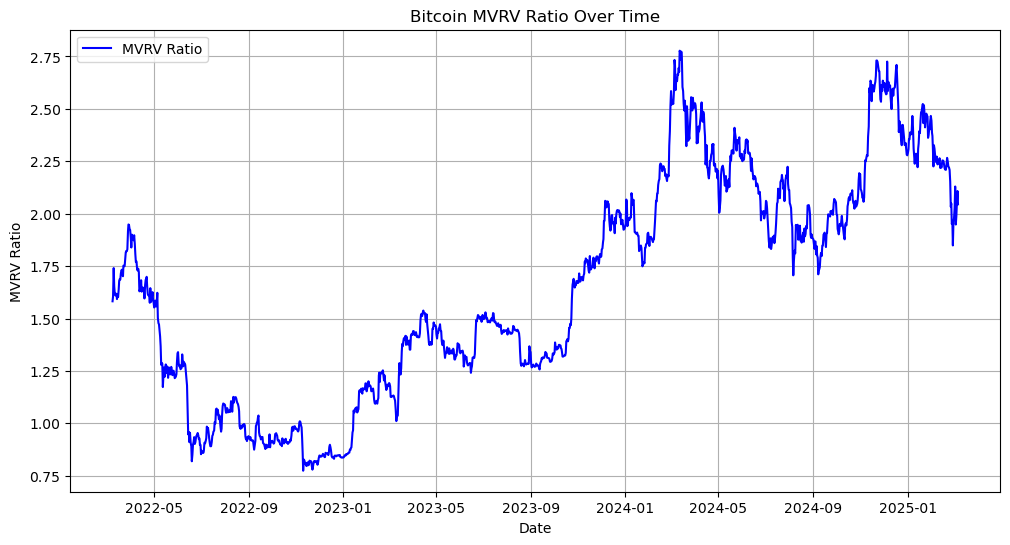

MVRV Ratio 데이터가 CSV 파일로 저장되었습니다: ./mvrv_ratio.csv


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = "./mvrv.json"

# JSON 파일 로드
with open(file_path, "r") as file:
    data = json.load(file)

# MVRV 데이터 추출
mvrv_data = data["mvrv"]
df = pd.DataFrame(mvrv_data)

# 타임스탬프를 날짜로 변환
df["date"] = pd.to_datetime(df["x"], unit="ms")
df["MVRV"] = df["y"]
df = df[["date", "MVRV"]]  # 필요한 컬럼만 유지

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["MVRV"], label="MVRV Ratio", color="blue")
plt.xlabel("Date")
plt.ylabel("MVRV Ratio")
plt.title("Bitcoin MVRV Ratio Over Time")
plt.legend()
plt.grid()
plt.show()

# CSV 파일 저장
csv_path = "./mvrv_ratio.csv"
df.to_csv(csv_path, index=False)
print(f"MVRV Ratio 데이터가 CSV 파일로 저장되었습니다: {csv_path}")